In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix



In [200]:
# Load data
data = pd.read_csv('high_diamond_ranked_10min.csv')
data = data.drop('gameId', axis =1)

In [201]:
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [202]:
#Check data type and if there is any missing data 
data.info()

#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [203]:
# #change data type
# data['blueWins'] = data['blueWins'].astype('object')


In [204]:
data['blueWins'].describe()

count    9879.000000
mean        0.499038
std         0.500024
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: blueWins, dtype: float64

In [205]:
data.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

/.../site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


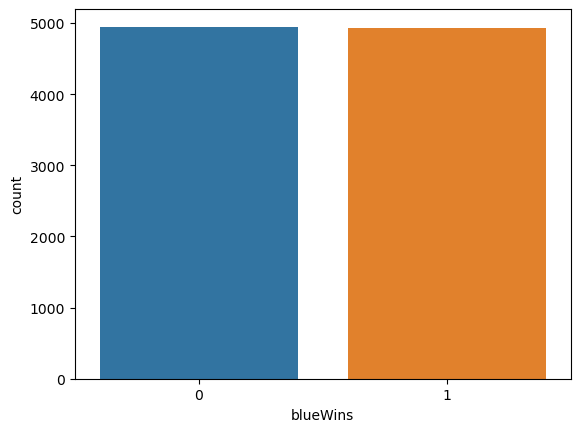

In [206]:
#visualization, in this dataset, blue team almost won half and lost half

# BlueWins 
sns.countplot(data['blueWins'])
plt.show()

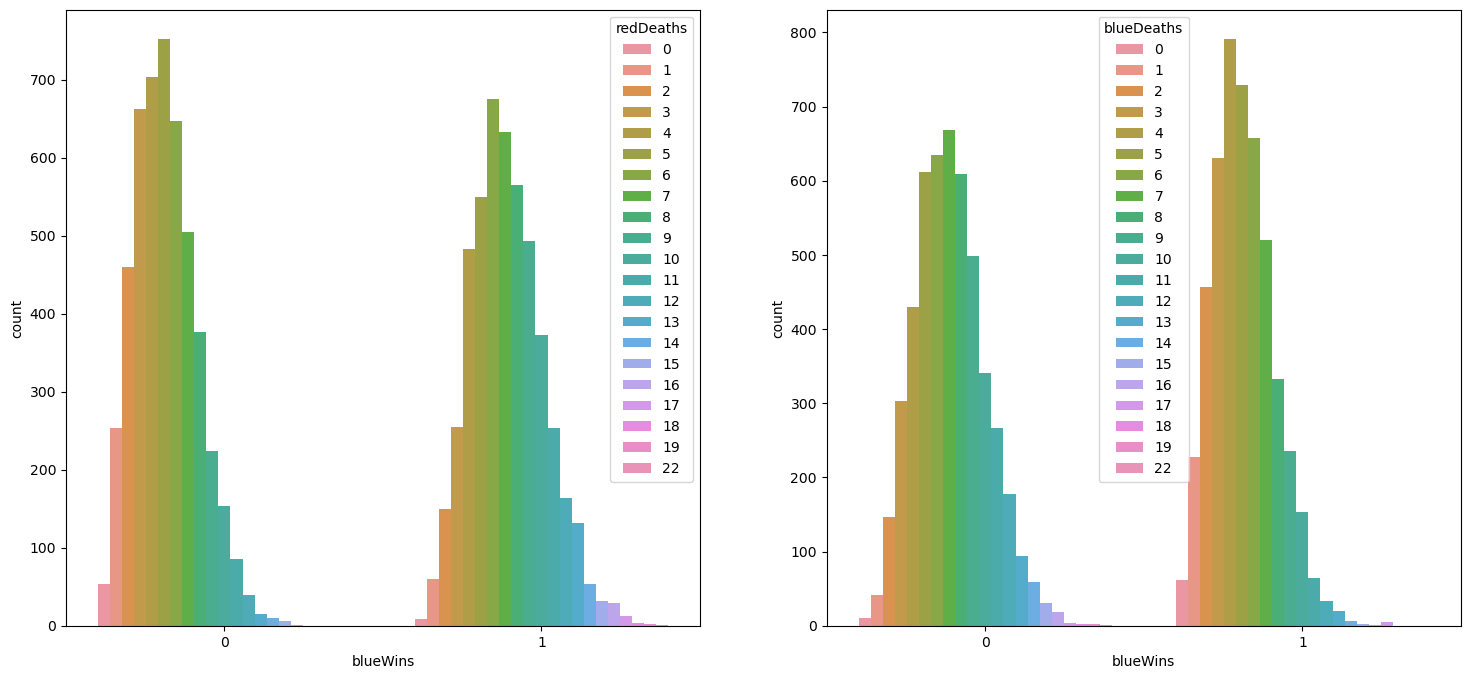

In [207]:
#some visulization to explore data

fig, ax = plt.subplots(1,2,figsize=(18,8))
#sns.countplot(x="blueWins", hue="blueWardsPlaced", data=data)
#sns.countplot(x="blueWins", hue="blueWardsDestroyed", data=data)
#sns.countplot(x="blueWins", hue="blueFirstBlood", data=data)
#sns.countplot(x="blueWins", hue="blueKills", data=data)
#sns.countplot(x="blueWins", hue="blueDeaths", data=data)
#sns.countplot(x="blueWins", hue="redWardsPlaced", data=data)
#sns.countplot(x="blueWins", hue="redWardsDestroyed", data=data)
#sns.countplot(x="blueWins", hue="redKills", data=data)
#plt.figure(figsize = (8,8))
sns.countplot(x="blueWins",  hue="redDeaths",data=data, ax = ax[0]) 
sns.countplot(x="blueWins",  hue="blueDeaths",data=data,ax = ax[1])
plt.show()


In [208]:
#Correaltion
corr = data.corr().round(3)
corr

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,1.000,0.000,0.044,0.202,0.337,-0.339,0.277,0.222,0.214,0.092,...,-0.104,-0.411,-0.352,-0.388,-0.212,-0.111,-0.511,-0.490,-0.212,-0.411
blueWardsPlaced,0.000,1.000,0.034,0.003,0.018,-0.003,0.033,0.020,0.018,0.010,...,-0.008,-0.006,-0.009,-0.013,-0.012,0.001,-0.016,-0.028,-0.012,-0.006
blueWardsDestroyed,0.044,0.034,1.000,0.018,0.034,-0.073,0.068,0.042,0.041,0.017,...,-0.024,-0.067,-0.059,-0.057,0.040,-0.036,-0.079,-0.078,0.040,-0.067
blueFirstBlood,0.202,0.003,0.018,1.000,0.269,-0.248,0.229,0.152,0.134,0.078,...,-0.070,-0.301,-0.183,-0.195,-0.157,-0.025,-0.379,-0.241,-0.157,-0.301
blueKills,0.337,0.018,0.034,0.269,1.000,0.004,0.814,0.179,0.170,0.076,...,-0.082,-0.161,-0.412,-0.462,-0.472,-0.214,-0.654,-0.584,-0.472,-0.161
blueDeaths,-0.339,-0.003,-0.073,-0.248,0.004,1.000,-0.026,-0.205,-0.189,-0.096,...,0.157,0.886,0.433,0.465,-0.041,-0.100,0.640,0.578,-0.041,0.886
blueAssists,0.277,0.033,0.068,0.229,0.814,-0.026,1.000,0.149,0.171,0.028,...,-0.061,-0.134,-0.357,-0.397,-0.338,-0.161,-0.550,-0.437,-0.338,-0.134
blueEliteMonsters,0.222,0.020,0.042,0.152,0.179,-0.205,0.149,1.000,0.781,0.640,...,-0.052,-0.217,-0.170,-0.190,-0.075,-0.088,-0.281,-0.264,-0.075,-0.217
blueDragons,0.214,0.018,0.041,0.134,0.170,-0.189,0.171,0.781,1.000,0.020,...,-0.033,-0.193,-0.150,-0.159,-0.060,-0.098,-0.234,-0.211,-0.060,-0.193
blueHeralds,0.092,0.010,0.017,0.078,0.076,-0.096,0.028,0.640,0.020,1.000,...,-0.043,-0.110,-0.087,-0.108,-0.046,-0.020,-0.163,-0.162,-0.046,-0.110


In [209]:
#Create mask for upper triangle 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True 

<ipython-input-209-497a607a4444>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


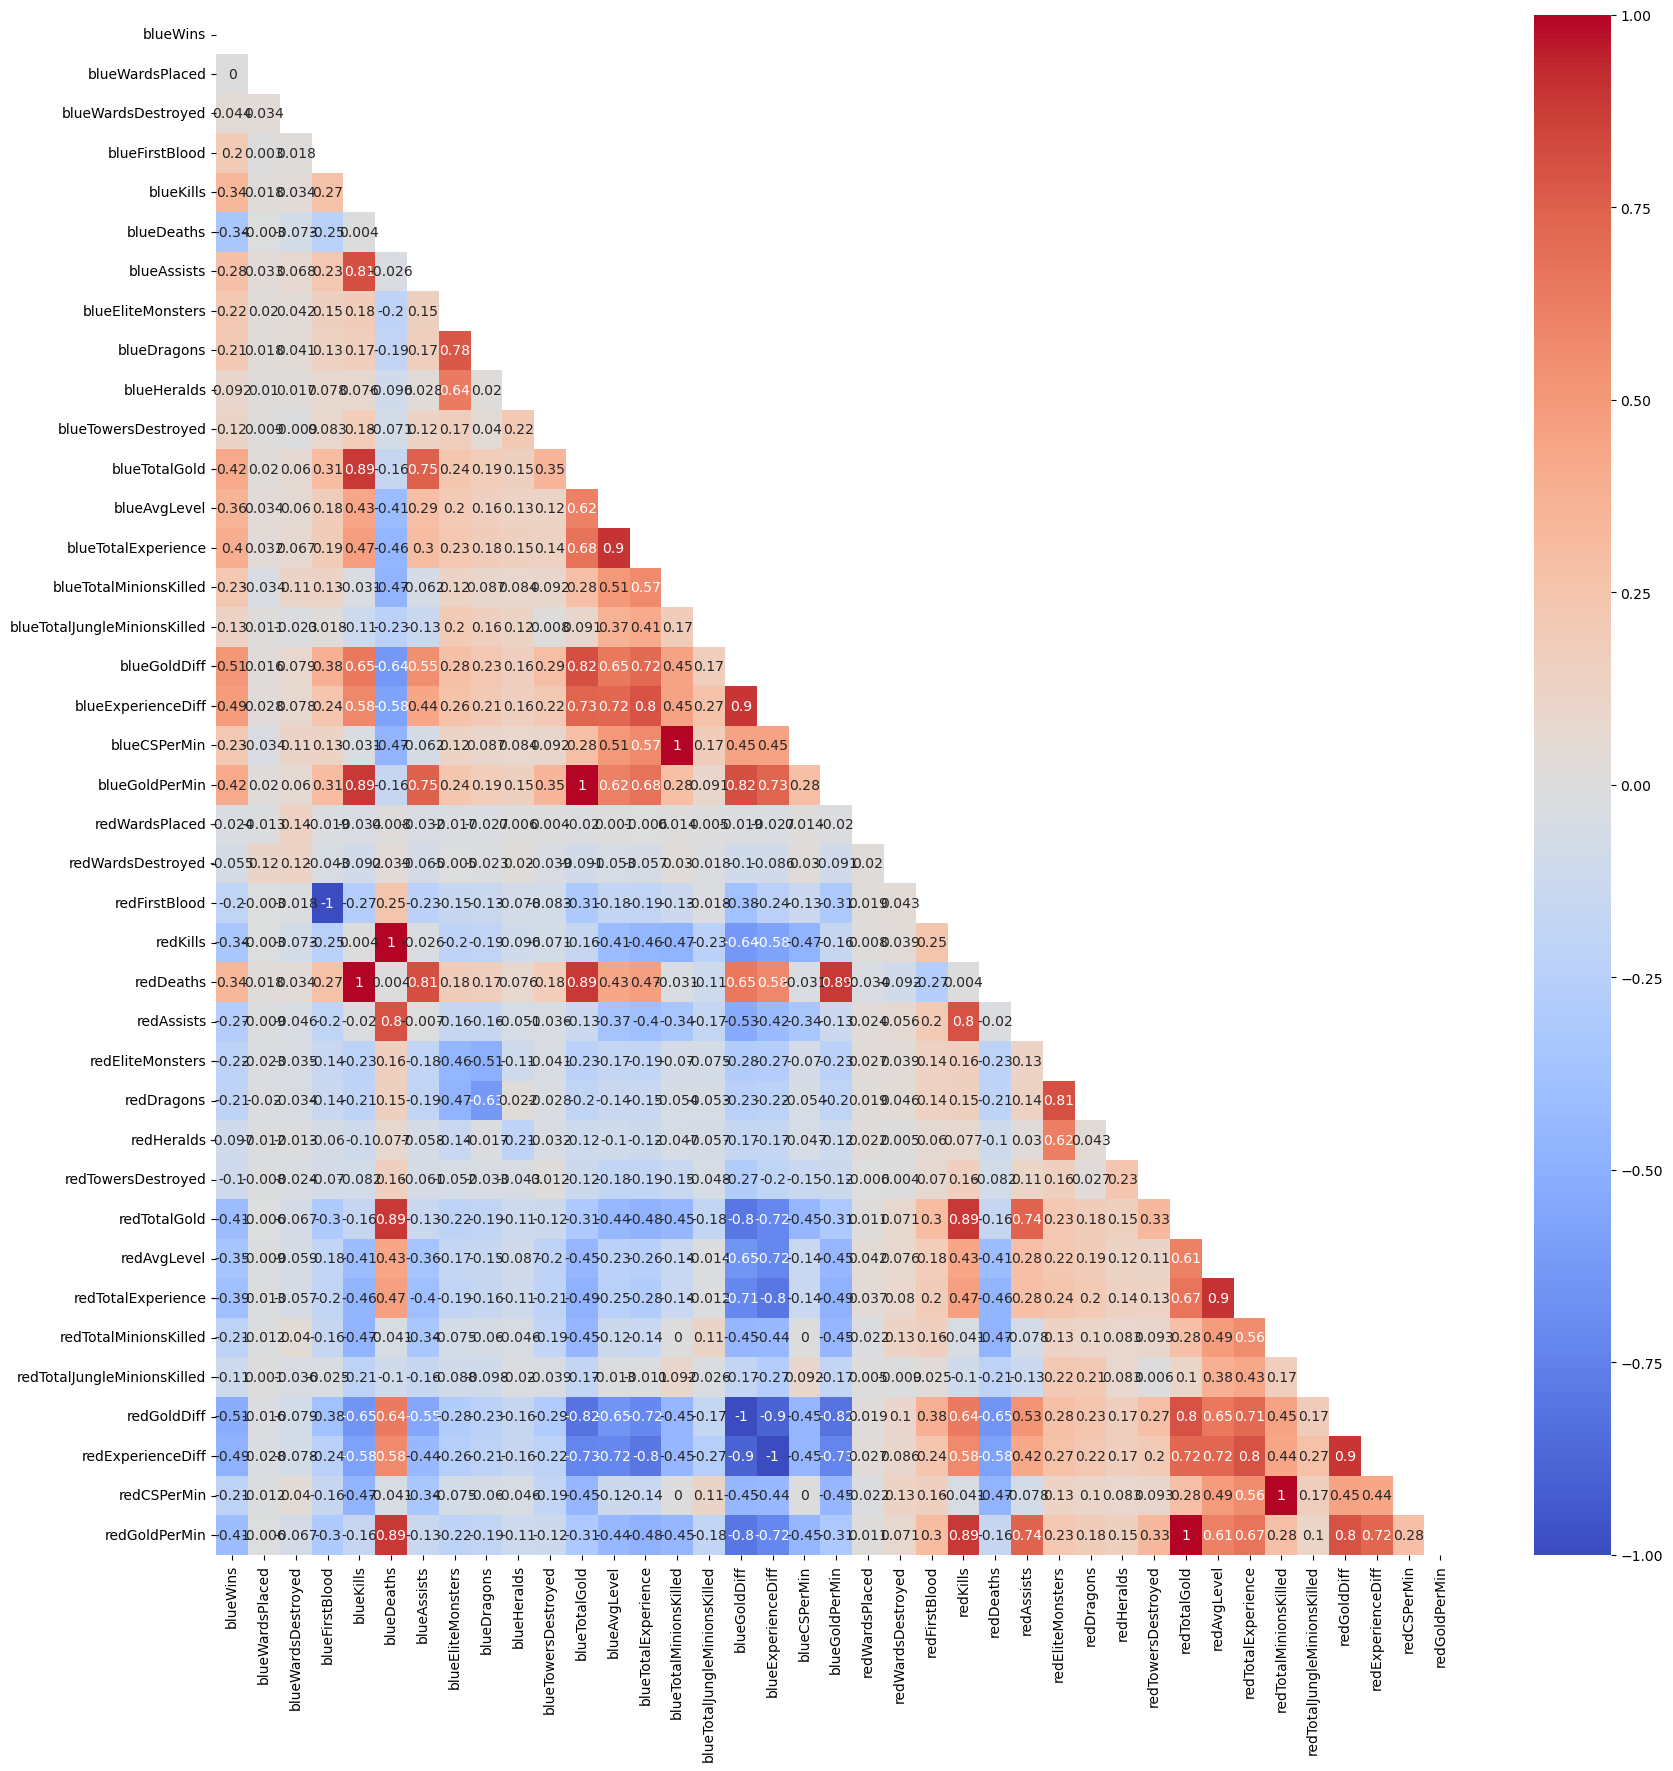

In [210]:
# Create heatmap correlation plot
fig, ax = plt.subplots(1,1,figsize=(20,20))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()


In [211]:
# delete the perfectly correlated feature
#redDeaths, redKills, blueCSPerMin, blueGoldPerMin, redCSPerMin, redGoldPerMin, redFirstBlood, redGoldDiff, redExperienceDiff

data = data.drop(['redDeaths', 'redKills', 'blueCSPerMin', 'blueGoldPerMin', 'redCSPerMin', 'redGoldPerMin','redFirstBlood','redGoldDiff','redExperienceDiff'], axis = 1)


In [212]:
# Split data into feature and label dataset
X = data.drop(['blueWins'], axis = 1)
y = data['blueWins']

# Split training dataset and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Build DNN Model

In [213]:
# Build model
model = Sequential()
model.add(Dense(units= 64, activation = 'relu', input_dim = len(X_train.columns)))
model.add(Dense(units= 128, activation ='relu'))
model.add(Dense(units = 1, activation ='sigmoid'))

In [215]:
# Compile model 
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = 'accuracy')

In [216]:
# Fit the training dataset
model.fit(X_train, 
          y_train, 
          epochs = 100, 
          batch_size = 32)

Epoch 1/100
247/247 [==============================] - 1s 2ms/step - loss: 66.2154 - accuracy: 0.6376
Epoch 2/100
247/247 [==============================] - 1s 2ms/step - loss: 24.5285 - accuracy: 0.6417
Epoch 3/100
247/247 [==============================] - 0s 2ms/step - loss: 26.4060 - accuracy: 0.6348
Epoch 4/100
247/247 [==============================] - 0s 2ms/step - loss: 18.6691 - accuracy: 0.6433A: 0s - loss: 19.8488 - accuracy: 0.6
Epoch 5/100
247/247 [==============================] - 0s 2ms/step - loss: 15.8322 - accuracy: 0.6413
Epoch 6/100
247/247 [==============================] - 0s 2ms/step - loss: 18.2744 - accuracy: 0.6381A: 0s - loss: 18.8048 - accuracy: 0.6
Epoch 7/100
247/247 [==============================] - 0s 1ms/step - loss: 14.9084 - accuracy: 0.6339
Epoch 8/100
247/247 [==============================] - 0s 1ms/step - loss: 12.4349 - accuracy: 0.6491
Epoch 9/100
247/247 [==============================] - 0s 1ms/step - loss: 12.7470 - accuracy: 0.6432
Epoch 10

247/247 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.7018
Epoch 81/100
247/247 [==============================] - 0s 1ms/step - loss: 0.5851 - accuracy: 0.7061
Epoch 82/100
247/247 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.6990
Epoch 83/100
247/247 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.7130
Epoch 84/100
247/247 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.7071
Epoch 85/100
247/247 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7152
Epoch 86/100
247/247 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.7085
Epoch 87/100
247/247 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.7010
Epoch 88/100
247/247 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7140
Epoch 89/100
247/247 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 

In [217]:
# Predict
y_hat = model.predict(X_test)
y_hat = [0 if val <0.5 else 1 for val in y_hat]
y_hat[:20]

[0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1]

In [229]:
#evaluate the model accuracy
measure = round(accuracy_score(y_test,y_hat)*100,4)
print(measure)
#Classification Report
print('Classification Report: \n',classification_report(y_test,y_hat))
#Confusion Matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_hat))


72.7227
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.64      0.70       983
           1       0.70      0.81      0.75       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976

Confusion Matrix: 
 [[633 350]
 [189 804]]


### Use Random Forest Model and Determine the most important feature for winning 

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics

In [224]:
# Standardize the scale of the features, fit and transform the feature data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [225]:
#Build the Random Forest Model
rfc = RandomForestClassifier(n_estimators = 200, random_state =42)

# Fit the model with data
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [227]:
#Predict the data 
y_pred = rfc.predict(X_test)
y_pred[:20]

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [228]:
print('accuracy score is: ', round(accuracy_score(y_test,y_pred)*100,4))
print('Classification Report: \n',classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

accuracy score is:  73.2287
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       983
           1       0.74      0.72      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976

Confusion Matrix: 
 [[729 254]
 [275 718]]


/.../site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


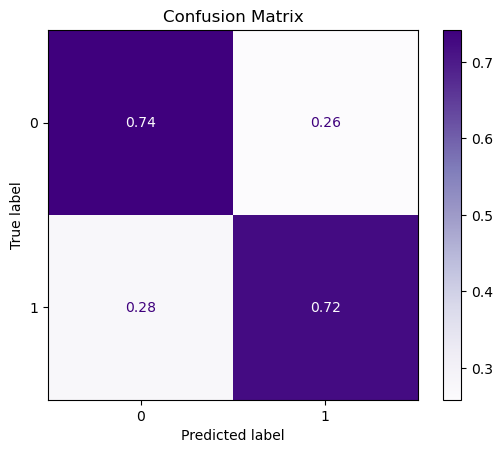

In [263]:
#plot Confusion Matrix
plot_confusion_matrix(rfc, X_test,
                      y_test,normalize='true',
                     cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

/.../site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


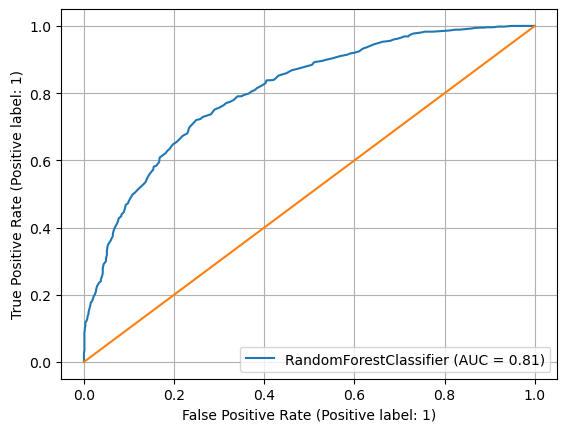

In [267]:
# Plot ROC
metrics.plot_roc_curve(rfc,X_test,y_test)
plt.plot([0,1],[0,1])
plt.grid()
plt.show()

### Build SVC Model

In [268]:
#Build Model
svcmodel = svm.SVC()
svcmodel.fit(X_train, y_train)
y_svc = svcmodel.predict(X_test)
y_svc[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [269]:
#Evaluate Model 
print('accuracy score is: ', round(accuracy_score(y_test,y_svc)*100,4))
print('Classification Report: \n', classification_report(y_test, y_svc))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_svc) )

accuracy score is:  72.2672
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       983
           1       0.73      0.71      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

Confusion Matrix: 
 [[720 263]
 [285 708]]


### Logistic Regression Model 

In [270]:
from sklearn.linear_model import LogisticRegression

In [271]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [272]:
print('accuracy score is: ', round(accuracy_score(y_test,lr_pred)*100,4))
print('Classification Report: \n',classification_report(y_test, lr_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, lr_pred))

accuracy score is:  73.1781
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.73      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976

Confusion Matrix: 
 [[718 265]
 [265 728]]


It seems like Randfom Forest Model has the best accuracy among the 3 models
Therefore, using Randfom Forest Model to identify the most important features that determin the LOL competation results 

[0.03502269 0.02320164 0.00791815 0.02824928 0.02963524 0.0303872
 0.01004267 0.00766249 0.00476224 0.00170525 0.08100721 0.02156922
 0.06759507 0.04184676 0.03781981 0.12302581 0.10324259 0.03380042
 0.02335812 0.03003949 0.01039803 0.00682914 0.00425811 0.00189044
 0.0714222  0.02252142 0.0624752  0.04169537 0.03661875]
                             key  importances
15                  blueGoldDiff     0.123026
16            blueExperienceDiff     0.103243
10                 blueTotalGold     0.081007
24                  redTotalGold     0.071422
12           blueTotalExperience     0.067595
26            redTotalExperience     0.062475
13        blueTotalMinionsKilled     0.041847
27         redTotalMinionsKilled     0.041695
14  blueTotalJungleMinionsKilled     0.037820
28   redTotalJungleMinionsKilled     0.036619
0                blueWardsPlaced     0.035023
17                redWardsPlaced     0.033800
5                    blueAssists     0.030387
19                    redAssists

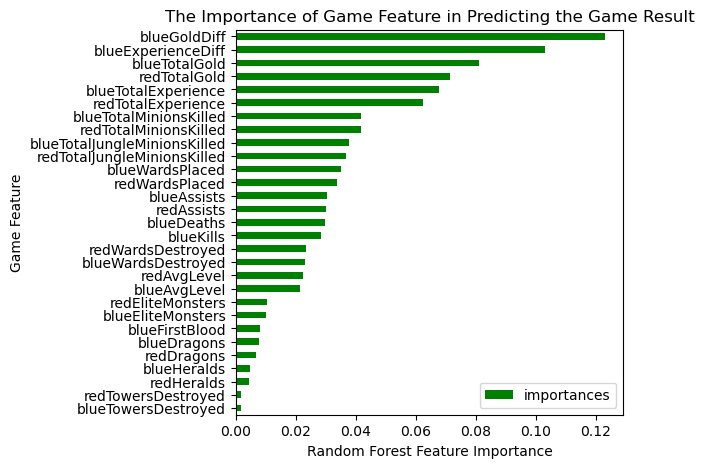

In [288]:
# Feature importance
print(rfc.feature_importances_)

# Plot the feautre importance 
#Create Dataframe
feat_importance = rfc.feature_importances_
df_feat = pd.DataFrame({'key':X.columns, 'importances':feat_importance}).sort_values(by ='importances', ascending = False)

print(df_feat)

#plot feature importance
df_feat.plot(kind='barh', x = 'key',y='importances', color = 'g', figsize=(5, 5)).invert_yaxis()
plt.xlabel("Random Forest Feature Importance")
plt.ylabel('Game Feature')
plt.title('The Importance of Game Feature in Predicting the Game Result')
plt.show()

